In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits, ascii
import numpy as np
from astropy.wcs import WCS
from matplotlib import colors
from astropy import units as u
from radio_beam import Beam
from matplotlib.patches import Ellipse, Rectangle
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'
w51n_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B6_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'




#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'

#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""



w51e_b3_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg'
w51e_b6_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg'

w51n_b3_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg'
w51n_b6_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg'


w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'



In [2]:
def plot_catalog_on_image(ax,image,hdrNB,catdatadir,band='B6',beam=None, norm='linear', 
                          label=None,color='cyan',lw=2,aperture='fwhm+beam',xysource=None, skip_image_plot=False,
                         ls='solid',vmin=0.1,vmax=1):
    catdata = ascii.read(catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
    sky_ra = catdata['WCS_ACOOR']
    sky_dec = catdata['WCS_DCOOR']
    no = catdata['NO']
    if band=='B3':
        bandlabel = '03'
    elif band=='B6':
        bandlabel = '02'
    fooa = catdata['FOOA%s'%bandlabel]
    foob = catdata['FOOB%s'%bandlabel]
    theta = catdata['THETA%s'%bandlabel]
    afwhm = catdata['AFWHM%s'%bandlabel]
    bfwhm = catdata['BFWHM%s'%bandlabel]
   
    
    
    if label is not None:
        sky_ra= sky_ra[label]
        sky_dec = sky_dec[label]
        fooa = fooa[label]
        foob = foob[label]
        theta = theta[label]
        no = no[label]
        afwhm = afwhm[label]
        bfwhm = bfwhm[label]

    skypos = np.vstack((sky_ra,sky_dec)).T

    
    wcsNB = WCS(hdrNB,naxis=2)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]
    beamNB = Beam.from_fits_header(hdrNB)

    if not skip_image_plot:
        image = fitsdata[0].data[0][0]
        if norm=='sqrt':
            ax.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),
                      norm=colors.PowerNorm(gamma=0.5,vmin=vmin,vmax=vmax))
        elif norm=='log':
            ax.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),
                      norm=colors.FuncNorm(functions=(log_forward,log_backward),vmin=vmin,vmax=vmax))
        else:
            ax.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),vmin=vmin,vmax=vmax)

    xypos = wcsNB.wcs_world2pix(skypos,0)
    xpos = xypos[:,0]
    ypos = xypos[:,1]
    
    
        
    indexlist = []
    for i in range(len(xypos)):
        if aperture is 'footprint':
            major = fooa[i]/3600/scaleNB.value
            minor = foob[i]/3600/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'fwhm+beam':
            meanbeamsize = (beam.major.value+beam.minor.value)/4
            major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
            minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'beam':
            major = beam.major.value/scaleNB.value
            minor = beam.minor.value/scaleNB.value
            pa = 180-beam.pa.value

        ellipse = Ellipse(xypos[i],width=major,height=minor,facecolor='none',
                          angle=pa,edgecolor=color,lw=lw,ls=ls)
        
        ax.add_patch(ellipse)
        
def add_scale_bar(ax, xpos,ypos,scale, pixel_scale, dist, unit='pc',height=20,color='w',pad=40,size=40,xoffset=0.05):
    phy_pix_scale = pixel_scale.value * np.pi/180 * dist
    ax.add_patch(Rectangle((xpos,ypos),scale/phy_pix_scale,height,color=color))
    ax.text(xpos+(0.4+xoffset)*scale/phy_pix_scale, ypos+pad, '%2.1f %s'%(scale, unit), color=color,fontsize=size)
                
def add_beam(ax,xpos,ypos,beam, pixel_scale,color='w'):
    width = beam.major / pixel_scale
    height = beam.minor /pixel_scale
    angle = beam.pa
    ax.add_patch(Ellipse((xpos,ypos),width.value,height.value,180-angle.value,color=color))
    
def auto_scale_lim(ax, ra, dec, WCShdr):
    pixpos1 = WCShdr.world_to_pix(ra[0],dec[0])
    pixpos2 = WCShdr.world_to_pix(ra[1],dec[1])
    
    ax.set_xlim(pixpos1[0],pixpos2[0])
    ax.set_ylim(pixpos1[1],pixpos2[1])
    


    
    


<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:65: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:65: SyntaxWarning: "is" with a literal. Did you mean "=="?
/scratch/local/65101088/ipykernel_8947/3278051749.py:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if aperture is 'footprint':
/scratch/local/65101088/ipykernel_8947/3278051749.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif aperture is 'fwhm+beam':
/scratch/local/65101088/ipykernel_8947/3278051749.py:65: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif aperture is 'beam':


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


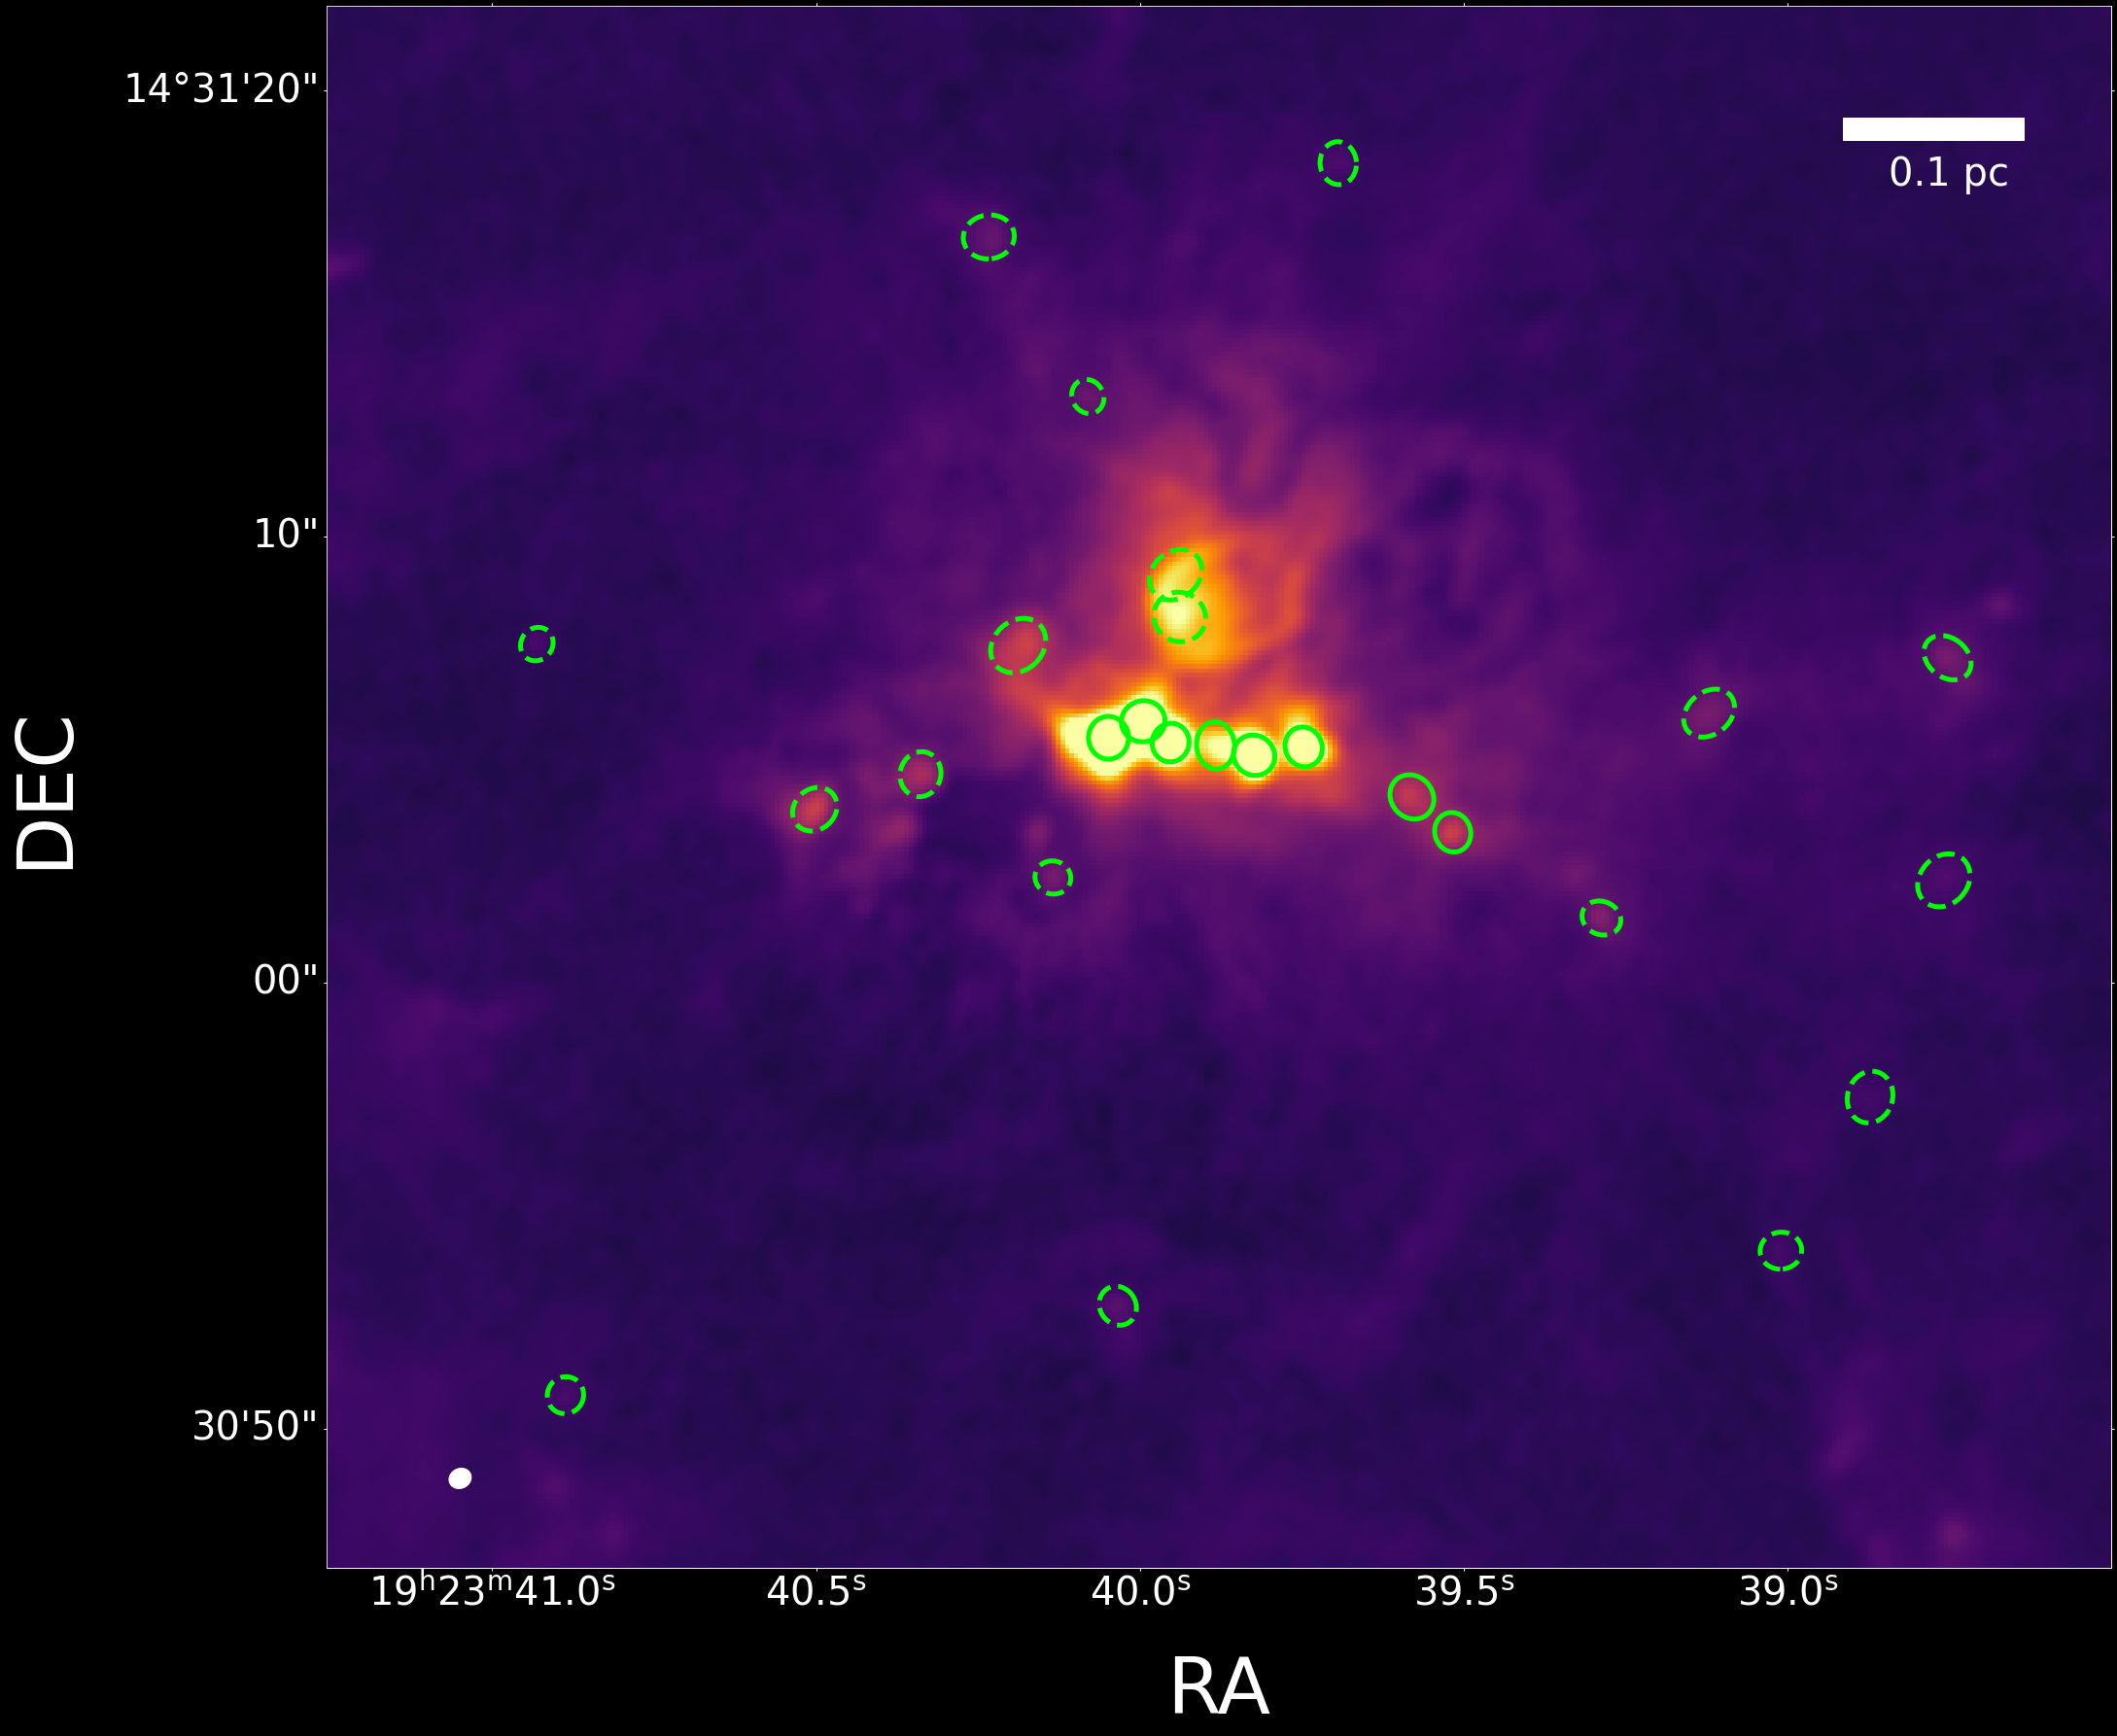

In [3]:
plt.rcParams['axes.labelsize']=80
plt.rcParams['xtick.labelsize']=40
plt.rcParams['ytick.labelsize']=40
plt.rcParams['axes.titlesize']=80
plt.style.use('dark_background')

w51n_cat_almaimf = Table.read('../comparison/alma_imf_on_the_img_w51n.fits',format='fits')
w51n_almaimf_ind = w51n_cat_almaimf['index']
nofragments = np.where(w51n_cat_almaimf['fragments']<1)[0]
yesfragments = np.where(w51n_cat_almaimf['fragments']>=1)[0]

hdr_lr6 = fits.getheader(w51n_b6_almaimf)
fitsdata = fits.open(w51n_b6_almaimf)
image_lr6 = fitsdata[0].data[0][0]
wcs_lr6 = WCS(hdr_lr6, naxis=2)
beam_lr6 = Beam.from_fits_header(hdr_lr6)
scale_lr6 = wcs_lr6.proj_plane_pixel_scales()[0]

fig = plt.figure(figsize=(30,30))
ax1 = fig.add_axes([0.15,0.15,0.85,0.85],projection=wcs_lr6)
plot_catalog_on_image(ax1,image_lr6,hdr_lr6,cat_w51n,beam=beam_lr6, 
                          label=w51n_almaimf_ind[yesfragments],color='lime',lw=5,ls='solid',norm='sqrt', vmin=-0.002146,vmax=0.096917409)
plot_catalog_on_image(ax1,image_lr6,hdr_lr6,cat_w51n,beam=beam_lr6, 
                          label=w51n_almaimf_ind[nofragments],color='lime',lw=5,ls='dashed',norm='sqrt',vmin = -0.002146,vmax=0.096917409)
add_scale_bar(ax1, 690,720, 0.1, scale_lr6, 5.1e3,height=5, pad=-10, xoffset=-0.15)
add_beam(ax1, 380,420, beam_lr6, scale_lr6)
ax1.set_xlim(350,750)
ax1.set_ylim(400,750)
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
plt.savefig('w51n_almaimf.png')


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(array(4497.01131071), array(5476.15356708)) (array(5897.00518581), array(6876.15969206))


[]

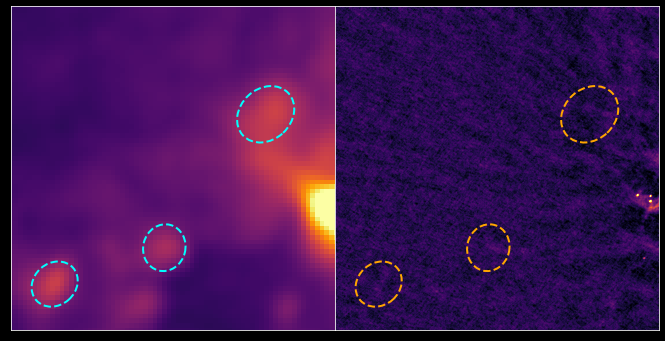

In [4]:
w51n_cat_almaimf = Table.read('../comparison/alma_imf_on_the_img_w51n.fits',format='fits')
w51n_almaimf_ind = w51n_cat_almaimf['index']
nofragments = np.where(w51n_cat_almaimf['fragments']<1)[0]
yesfragments = np.where(w51n_cat_almaimf['fragments']>=1)[0]

hdr_lr6 = fits.getheader(w51n_b6_almaimf)
fitsdata = fits.open(w51n_b6_almaimf)
image_lr6 = fitsdata[0].data[0][0]
wcs_lr6 = WCS(hdr_lr6, naxis=2)
beam_lr6 = Beam.from_fits_header(hdr_lr6)
scale_lr6 = wcs_lr6.proj_plane_pixel_scales()[0]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.45,0.9])
ax2 = fig.add_axes([0.55,0.1,0.45,0.9])

                   
#plot_catalog_on_image(ax1,image_lr6,hdr_lr6,cat_w51n,beam=beam_lr6, 
#                          label=w51n_almaimf_ind[yesfragments],color='lime',lw=3,ls='solid',norm='sqrt', vmin=-0.002146,vmax=0.096917409)
plot_catalog_on_image(ax1,image_lr6,hdr_lr6,cat_w51n,beam=beam_lr6, 
                          label=w51n_almaimf_ind[nofragments],color='cyan',lw=2,ls='dashed',norm='sqrt',vmin = -0.002146,vmax=0.096917409)

                   
ax1.set_xlim(450,520)
ax1.set_ylim(560,630)



hdr_hr6 = fits.getheader(w51n_b6_briggs)
fitsdata = fits.open(w51n_b6_briggs)
image_hr6 = fitsdata[0].data[0][0]
wcs_hr6 = WCS(hdr_hr6, naxis=2)

plot_catalog_on_image(ax2,image_hr6,hdr_hr6,cat_w51n,beam=beam_lr6, 
                          label=w51n_almaimf_ind[nofragments],color='orange',lw=2,ls='dashed',vmin=-0.00044910456346381985,vmax=0.002825138904779258)

sky1 = wcs_lr6.pixel_to_world(450,560)
sky2 = wcs_lr6.pixel_to_world(520,630)

pix1 = wcs_hr6.world_to_pixel(sky1)
pix2 = wcs_hr6.world_to_pixel(sky2)
print(pix1,pix2)
ax2.set_xlim(pix1[0],pix2[0])
ax2.set_ylim(pix1[1],pix2[1])
ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])
    

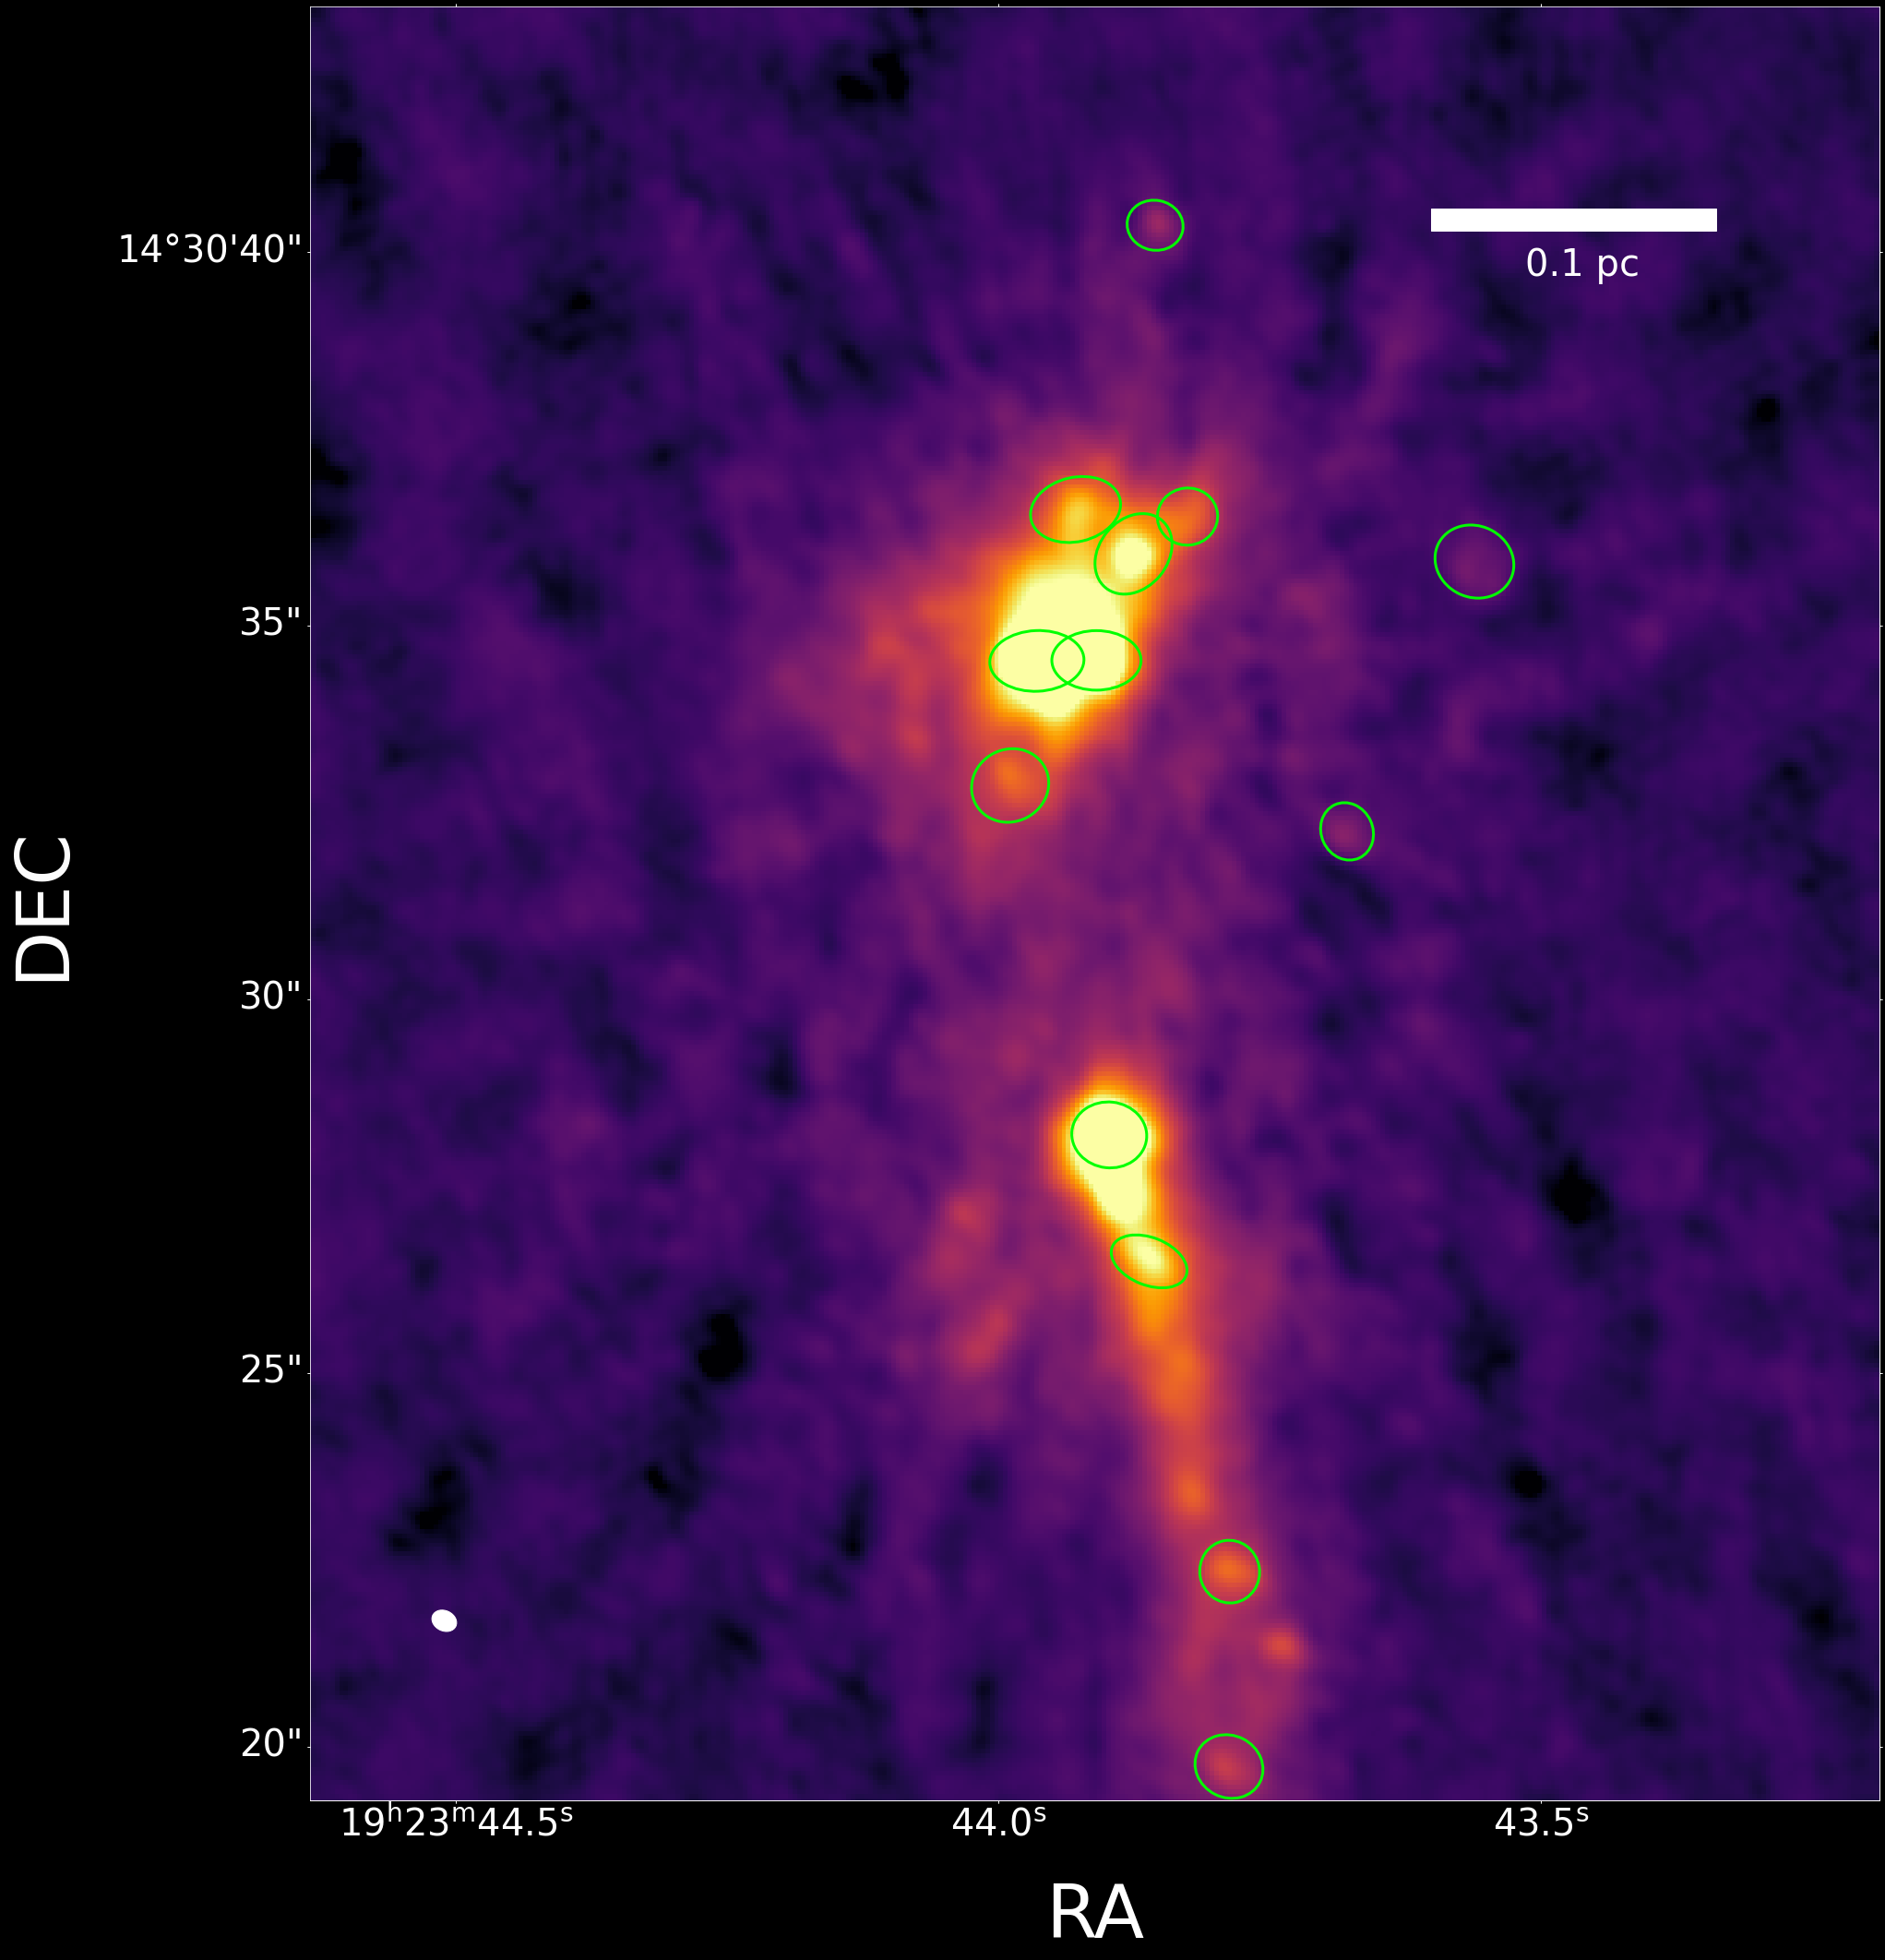

In [5]:
w51e_cat_almaimf = Table.read('../comparison/alma_imf_on_the_img_w51e.fits',format='fits')

w51e_almaimf_ind = w51e_cat_almaimf['index']
nofragments = np.where(w51e_cat_almaimf['fragments']<1)[0]
yesfragments = np.where(w51e_cat_almaimf['fragments']>=1)[0]

hdr_lr6 = fits.getheader(w51e_b6_almaimf)
fitsdata = fits.open(w51e_b6_almaimf)
image_lr6 = fitsdata[0].data[0][0]
wcs_lr6 = WCS(hdr_lr6, naxis=2)
beam_lr6 = Beam.from_fits_header(hdr_lr6)
scale_lr6 = wcs_lr6.proj_plane_pixel_scales()[0]

fig = plt.figure(figsize=(30,30))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcs_lr6)
plot_catalog_on_image(ax1,image_lr6,hdr_lr6,cat_w51e,beam=beam_lr6, 
                          label=w51e_almaimf_ind[yesfragments],color='lime',lw=3,ls='solid',norm='sqrt', vmin=-0.002146,vmax=0.096917409)
plot_catalog_on_image(ax1,image_lr6,hdr_lr6,cat_w51e,beam=beam_lr6, 
                          label=w51e_almaimf_ind[nofragments],color='lime',lw=3,ls='dashed',norm='sqrt',vmin = -0.002146,vmax=0.096917409)
add_scale_bar(ax1, 1100,1150, 0.1, scale_lr6, 5.41e3,height=5, pad=-10, xoffset=-0.07)
add_beam(ax1, 880,840, beam_lr6, scale_lr6)
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
ax1.set_xlim(850,1200)
ax1.set_ylim(800,1200)
plt.savefig('w51e_almaimf_catalog.png')


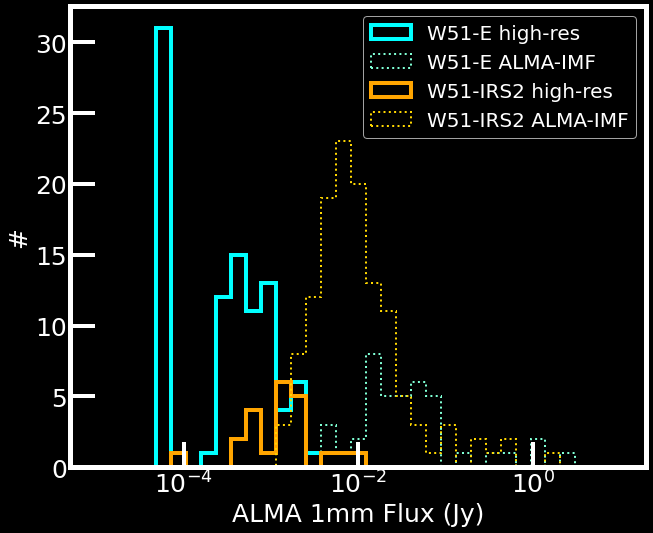

In [6]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 15
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 15
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5

class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]


fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
b6flux_w51e_hr = catalog['b6flux']
catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
b6flux_w51n_hr = catalog['b6flux']


w51e_almaimf_cat = catdata(cat_w51e,band='B6')
b6flux_w51e_lr = w51e_almaimf_cat.flux
w51n_almaimf_cat = catdata(cat_w51n,band='B6')
b6flux_w51n_lr = w51n_almaimf_cat.flux
bins = np.logspace(-5,1,36)
ax1.hist(b6flux_w51e_hr, histtype='stepfilled', facecolor='None', edgecolor='cyan', label='W51-E high-res',bins=bins, lw=4)
ax1.hist(b6flux_w51e_lr, histtype='stepfilled', facecolor='None', edgecolor='aquamarine', label='W51-E ALMA-IMF',bins=bins, lw=2,ls='dotted')
ax1.hist(b6flux_w51n_hr, histtype='stepfilled', facecolor='None', edgecolor='orange', label='W51-IRS2 high-res',bins=bins, lw=4,)
ax1.hist(b6flux_w51n_lr, histtype='stepfilled', facecolor='None', edgecolor='gold', label='W51-IRS2 ALMA-IMF',bins=bins, lw=2,ls='dotted')
ax1.set_xlabel('ALMA 1mm Flux (Jy)')
ax1.set_ylabel('#')
plt.legend(fontsize=20)
ax1.set_xscale('log')  
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
         
         
         
         
         

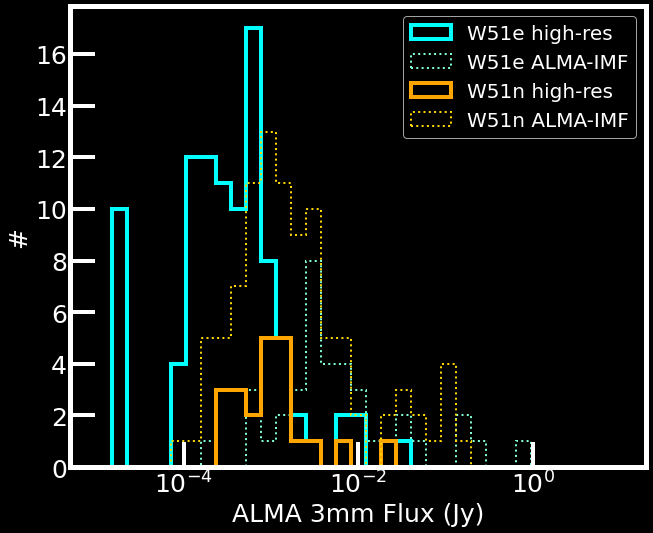

In [7]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 15
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 15
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5

class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]


fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
b6flux_w51e_hr = catalog['b3flux']
catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
b6flux_w51n_hr = catalog['b3flux']


w51e_almaimf_cat = catdata(cat_w51e,band='B3')
b6flux_w51e_lr = w51e_almaimf_cat.flux
w51n_almaimf_cat = catdata(cat_w51n,band='B3')
b6flux_w51n_lr = w51n_almaimf_cat.flux
bins = np.logspace(-5,1,36)
ax1.hist(b6flux_w51e_hr, histtype='stepfilled', facecolor='None', edgecolor='cyan', label='W51e high-res',bins=bins, lw=4)
ax1.hist(b6flux_w51e_lr, histtype='stepfilled', facecolor='None', edgecolor='aquamarine', label='W51e ALMA-IMF',bins=bins, lw=2,ls='dotted')
ax1.hist(b6flux_w51n_hr, histtype='stepfilled', facecolor='None', edgecolor='orange', label='W51n high-res',bins=bins, lw=4,)
ax1.hist(b6flux_w51n_lr, histtype='stepfilled', facecolor='None', edgecolor='gold', label='W51n ALMA-IMF',bins=bins, lw=2,ls='dotted')
ax1.set_xlabel('ALMA 3mm Flux (Jy)')
ax1.set_ylabel('#')
plt.legend(fontsize=20)
ax1.set_xscale('log')  
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
         
         
         
         
         